In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mirella Glowinska C00275764

Dataset Source: https://ai.stanford.edu/~amaas/data/sentiment/

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer?utm_source=chatgpt.com

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
------------------------------------------------------------------------------
Total number of reviews: 25000
------------------------------------------------------------------------------
Number of positive reviews: 12500
------------------------------------------------------------------------------
Number of negative reviews: 12500
------------------------------------------------------------------------------


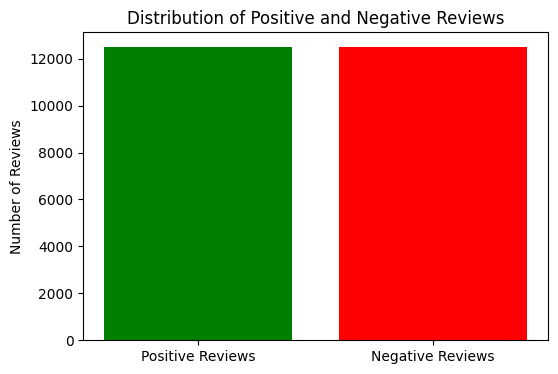

Accuracy: 0.868
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      2485
           1       0.89      0.84      0.86      2515

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

Label provided for new review: Positive


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

pos_folder = '/content/drive/MyDrive/Datasets/MovieReview/pos'
neg_folder = '/content/drive/MyDrive/Datasets/MovieReview/neg'

def load_data(folder_path, label):
    if not os.path.exists(folder_path):
        raise ValueError(f"Folder {folder_path} does not exist!")

    texts = []
    labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    first_char = file.read(1)
                    if not first_char:
                        print(f"Skipping empty file: {file_name}")
                        continue
                    file.seek(0)
                    texts.append(file.read())
                    labels.append(label)
            except Exception as e:
                print(f"Error reading {file_name}: {e}")
                continue
    return texts, labels


pos_texts, pos_labels = load_data(pos_folder, 1)
neg_texts, neg_labels = load_data(neg_folder, 0)

reviews = pos_texts + neg_texts
labels = pos_labels + neg_labels
print("------------------------------------------------------------------------------")
print("Total number of reviews:", len(reviews))
print("------------------------------------------------------------------------------")
print("Number of positive reviews:", len(pos_texts))
print("------------------------------------------------------------------------------")
print("Number of negative reviews:", len(neg_texts))
print("------------------------------------------------------------------------------")

num_pos = len(pos_texts)
num_neg = len(neg_texts)

plt.figure(figsize=(6, 4))
plt.bar(["Positive Reviews", "Negative Reviews"], [num_pos, num_neg], color=['green', 'red'])

plt.ylabel("Number of Reviews")
plt.title("Distribution of Positive and Negative Reviews")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

model = Pipeline([
    # Transforms a collection of text documents into a matrix of token counts
    ('vect', CountVectorizer()),
    # Transform a count-based representation of text data into Term Frequency-Inverse Document Frequency features
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

new_review = ["This movie was fantastic and I loved every minute of it!"]
prediction = model.predict(new_review)
print("Label provided for new review:", "Positive" if prediction[0] == 1 else "Negative")